# Modeling Index

In [41]:
import torch.nn.functional

from data_loading import load_data, create_dataloaders, split_dataset
import configuration
from modeling.Predictor import Predictor
from matplotlib import pyplot as plt
import numpy as np

data = load_data()

In [42]:
data = data[['Date', '_MKT', '_VA']]

window_size = 104
num_features = data.shape[1] - 1
length_pred = 1
look_ahead = 1

train_set, val_set, test_set = split_dataset(data, 
                                             window_size=window_size, 
                                             prediction_length=length_pred, 
                                             look_ahead=look_ahead,
                                             scale_target=True,
                                             fixed_feature_size = None,
                                             is_indexed=True)

train_loader, val_loader, test_loader = create_dataloaders(train_set, val_set, test_set, shuffle_train_loader=True)

In [43]:
import copy
from models.LSTM import LSTM
from modeling.Trainer import Trainer
from models.CNN import CNN

model = CNN(window_size=window_size, 
            num_features=num_features,
            output_size=length_pred,
            kernel_size=7, 
            num_conv=3,
            padding=True,
            channels=2,
            hidden_size=50,
            num_hidden_layers=2,
            dropout=0.25
            )
"""

model = LSTM(num_features = num_features,
             output_size = 1,
             num_LSTM_layers = 3,
             num_hidden_layers = 2,
             hidden_size = 200,
             dropout=0.25
)

"""
trainer = Trainer(copy.deepcopy(model), 
                  epochs = 50,
                  learning_rate = 1e-4) 

trained_model = trainer.train(train_loader, val_loader, print_out=True)

Epoch 1; train loss: 39.45048
Epoch 1; validation loss: 201.70774


Epoch 2; train loss: 34.18308
Epoch 2; validation loss: 203.36156


Epoch 3; train loss: 30.70413
Epoch 3; validation loss: 204.25232

Epoch 4; train loss: 27.62837
Epoch 4; validation loss: 200.74403


Epoch 5; train loss: 24.39705
Epoch 5; validation loss: 191.59178


Epoch 6; train loss: 21.25322
Epoch 6; validation loss: 174.20594

Epoch 7; train loss: 18.22335
Epoch 7; validation loss: 148.28051


Epoch 8; train loss: 15.16415
Epoch 8; validation loss: 116.20222


Epoch 9; train loss: 12.04334
Epoch 9; validation loss: 90.29932


Epoch 10; train loss: 9.36464
Epoch 10; validation loss: 68.65914


Epoch 11; train loss: 7.12987
Epoch 11; validation loss: 50.48959


Epoch 12; train loss: 4.9729
Epoch 12; validation loss: 32.93931

Epoch 13; train loss: 3.87367
Epoch 13; validation loss: 14.99759


Epoch 14; train loss: 2.4242
Epoch 14; validation loss: 8.14354


Epoch 15; train loss: 1.96192
Epoch 15; validation loss

In [44]:
import torch
predictor = Predictor(trained_model)

predictions, targets = predictor.predict(test_loader)

mse = torch.nn.functional.mse_loss(torch.tensor(predictions), torch.tensor(targets)).item()
mae = torch.nn.functional.l1_loss(torch.tensor(predictions), torch.tensor(targets)).item()

print("MSE: ", mse)
print("MAE:", mae)

MSE:  8.777924537658691
MAE: 1.9438362121582031


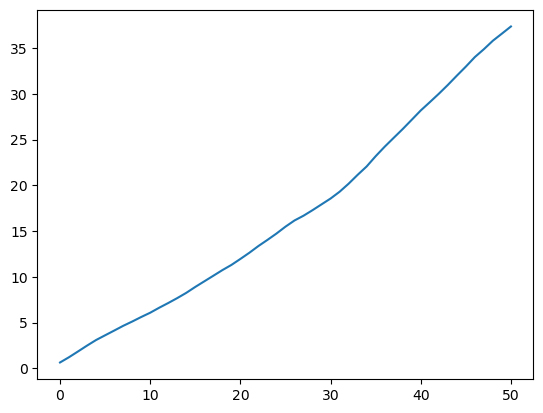

In [45]:
evolution = []
for i in range(1,52):
    mse = torch.nn.functional.mse_loss(torch.tensor(targets[i:]), torch.tensor(targets[:-i])).item()
    evolution.append(mse)
    
x = range(len(evolution))

plt.figure()
plt.plot(x, evolution)

plt.show()

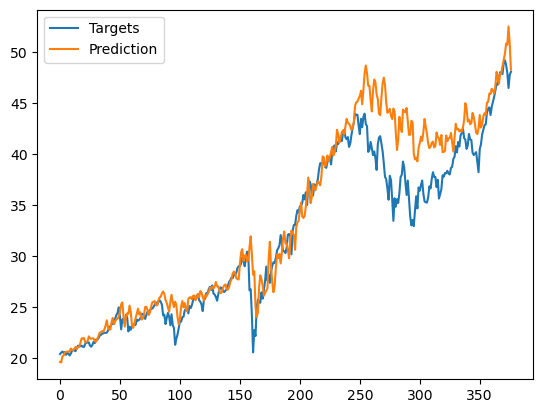

In [46]:
plt.figure()

x = range(len(targets))
plt.plot(x, targets, label='Targets')
plt.plot(x, predictions, label = 'Prediction')
plt.legend()
plt.show()

In [47]:
total_params = sum(p.numel() for p in model.parameters())
print("Parameter Count of Network:", total_params)

Parameter Count of Network: 22159


In [48]:
from torchview import torchview

model.eval()

model_graph = torchview.draw_graph(model, input_size=(100, 1, 24, 1))

total_params = sum(p.numel() for p in model.parameters())
print("Parameter Count of Network:", total_params)
print("\n")

model_graph.visual_graph

RuntimeError: Failed to run torchgraph see error message

In [ ]:
chart_values = [100 for i in range(look_ahead)]
chart_preds = [100 for i in range(look_ahead)]

for r in targets:
  chart_values.append(chart_values[-look_ahead]*(1+r))

for i, p in enumerate(predictions):
  chart_preds.append(chart_values[i]*(1+p))


naive_prediction = chart_values[:-look_ahead]

chart_preds = chart_preds[look_ahead:]
chart_values = chart_values[look_ahead:]

assert len(chart_preds) == len(chart_values)
assert len(naive_prediction) == len(chart_values)

x = range(len(chart_preds))

plt.figure()
plt.plot(x, chart_preds, color = 'orange')
plt.plot(x, chart_values, color = 'blue')
plt.show()

In [ ]:
plt.figure()
plt.hist(np.array(predictions)*100, bins=20, density=True, histtype = 'step', color = 'orange')
plt.hist(np.array(targets)*100, bins=20, density=True, histtype = 'step', color = 'blue')
plt.ylim(top=.5)
plt.show()

In [ ]:
plt.figure()

x = range(len(targets))
plt.plot(x, targets, label='Targets')
plt.plot(x, predictions, label = 'Prediction')
plt.legend()
plt.show()

In [ ]:
print(bob in people) 